# Credit Card Fraud Detection Predictions
### Alex Bartel
This project will utilize a dataset that focuses on credit card fraud. I will attempt to utilize data science and machine learning techniques to train a model to recognize fraudulent transactions based on a total of 29 features in the dataset. 28 of the features are anonymized numerical features, and the 29th is the purchase amount. 

### Dataset source: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Loading the Data
We'll take a look at the first five rows of the dataset to understand what we're dealing with. There are 28 anonymized features, the transaction amount, and the target, which is a binary variable where a 0 indicates a legitimate transaction and a 1 indicates a fraudulent transaction.

In [2]:
card_data = pd.read_csv("creditcard_2023.csv")
card_data.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


### Examining the Features
We will examine the features to understand their distributions better. I will use the describle method and create a density plot for each feature. 

In [3]:
summary = card_data.describe()
summary_rounded = summary.round(2)
summary_rounded

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,...,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.00,568630.0
mean,284314.50,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,12041.96,0.5
std,164149.49,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,6919.64,0.5
min,0.00,-3.50,-49.97,-3.18,-4.95,-9.95,-21.11,-4.35,-10.76,-3.75,...,-19.38,-7.73,-30.30,-4.07,-13.61,-8.23,-10.50,-39.04,50.01,0.0
25%,142157.25,-0.57,-0.49,-0.65,-0.66,-0.29,-0.45,-0.28,-0.19,-0.57,...,-0.17,-0.49,-0.24,-0.65,-0.55,-0.63,-0.30,-0.23,6054.89,0.0
50%,284314.50,-0.09,-0.14,0.00,-0.07,0.08,0.08,0.23,-0.11,0.09,...,-0.04,-0.03,-0.06,0.02,-0.01,-0.01,-0.17,-0.01,12030.15,0.5
75%,426471.75,0.83,0.34,0.63,0.71,0.44,0.50,0.53,0.05,0.56,...,0.15,0.46,0.16,0.70,0.55,0.67,0.33,0.41,18036.33,1.0
max,568629.00,2.23,4.36,14.13,3.20,42.72,26.17,217.87,5.96,20.27,...,8.09,12.63,31.71,12.97,14.62,5.62,113.23,77.26,24039.93,1.0


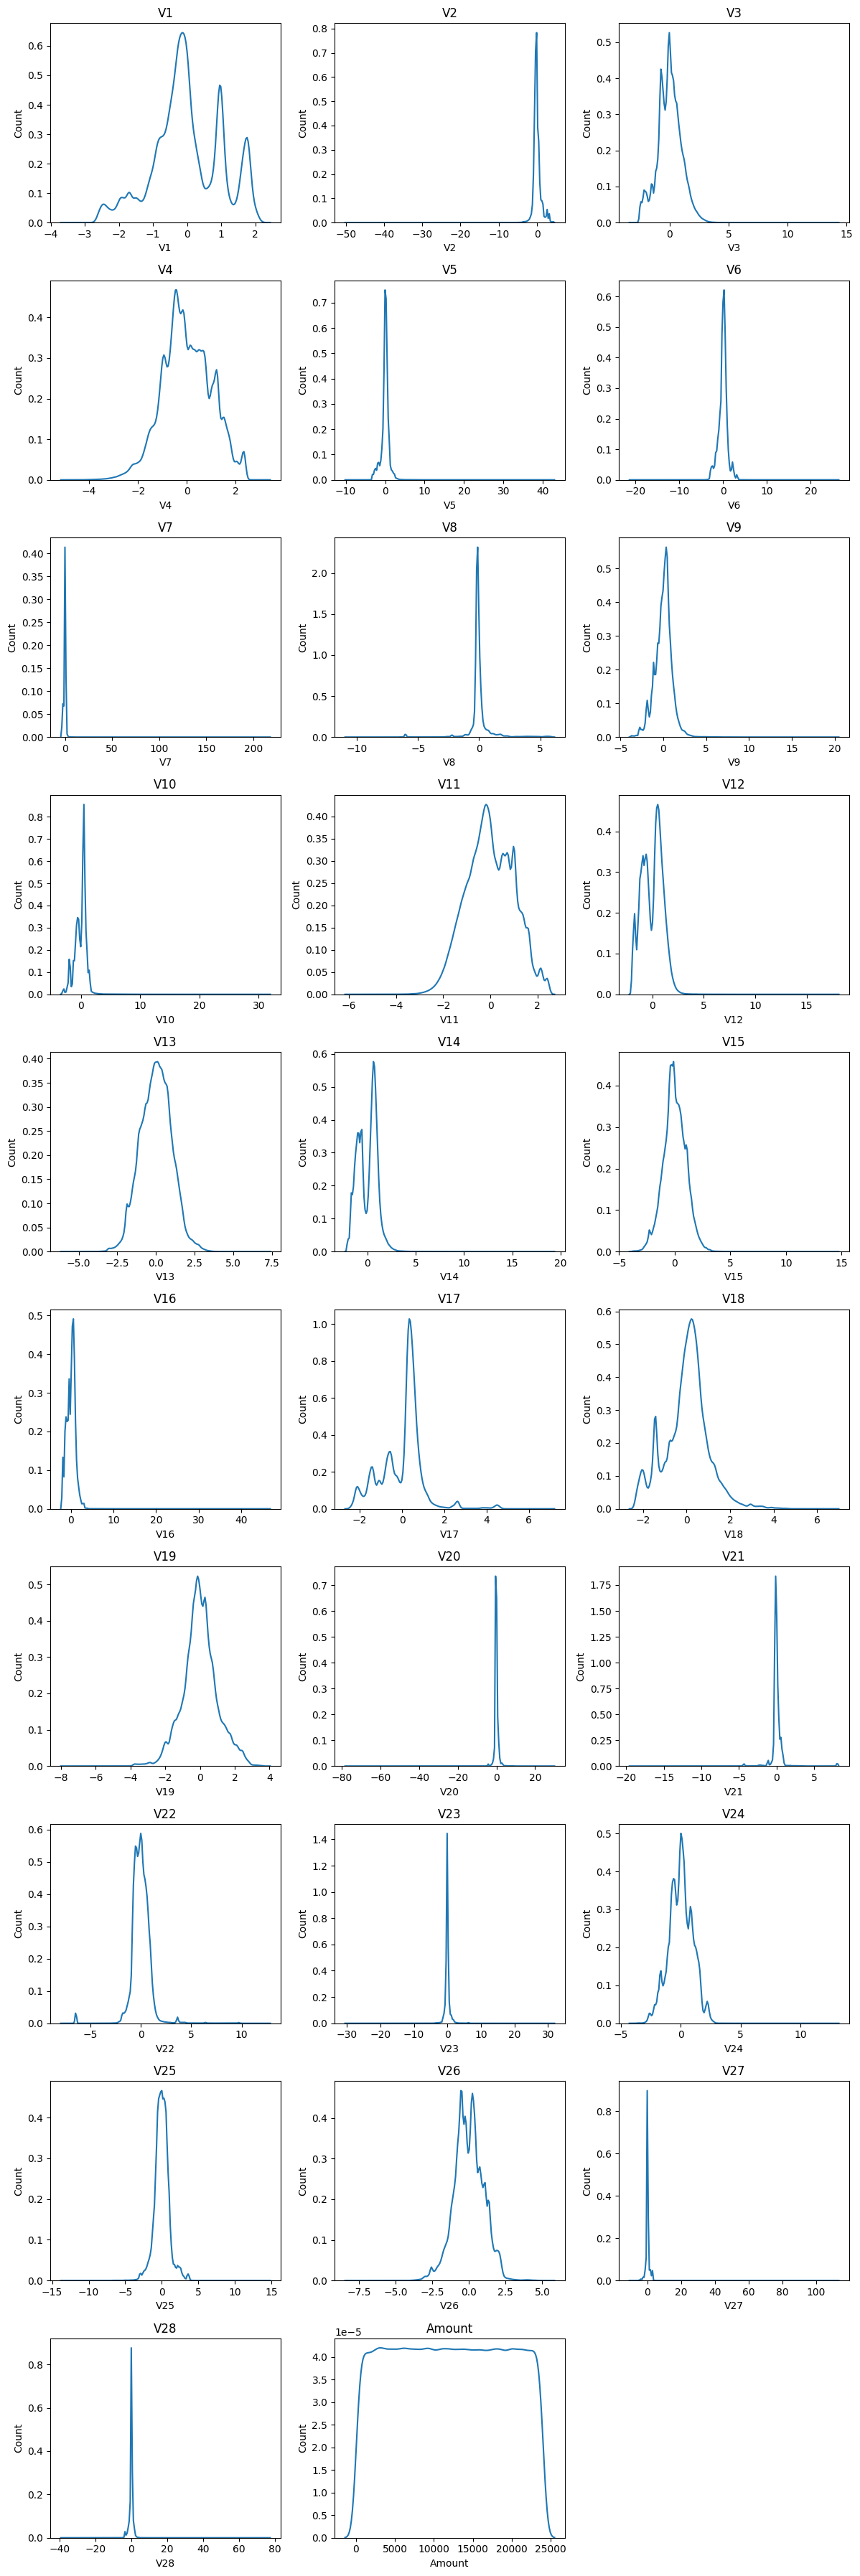

In [4]:
plt.figure(figsize=[12,36])
for i in range(1, 30):
    plt.subplot(10,3,i)
    sns.kdeplot(card_data.iloc[:, i])
    plt.title(card_data.columns[i])
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [5]:
card_data.loc[:, 'Class'].value_counts().sort_index()

Class
0    284315
1    284315
Name: count, dtype: int64

### Initial Exploration Findings
Based on this, we see that there are a variety of different distributions and values in our features, and that the dataset has come with the features already standardized (means of 0, standard deviations of 1) with the exception of the amount. Importantly, we also see that this will also be a balanced binary classification task. Since the amount could be an important feature, we will standardize that for our first model.

In [6]:
scaler = StandardScaler()
card_data['Amount'] = scaler.fit_transform(card_data[['Amount']])
card_data.head(5)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858447,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796369,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377011,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962119,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323285,0


### Training and Testing Data Split

Now I will split the dataset into a training dataset on which I will build my predictive models, as well as a validation dataset to gauge the relative performance of different models, and a final test dataset to determine the final model's performance.

In [7]:
X = card_data.iloc[:,1:30].values
y = card_data.loc[:,'Class'].values
X_train, X_hold, y_train, y_hold = train_test_split(X, y, stratify=y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_hold, y_hold, stratify=y_hold, test_size=0.5)

### Logistic Regression

I will start with a simple, but effective model for a binary classification task, logistic regression.

In [8]:
model_1 = LogisticRegression().fit(X_train, y_train)

In [9]:
model_1_train_preds = model_1.predict(X_train)
model_1_train_accuracy = np.sum(model_1_train_preds==y_train)/len(y_train)
model_1_val_preds = model_1.predict(X_val)
model_1_val_accuracy = np.sum(model_1_val_preds==y_val)/len(y_val)
print(f'The linear regression model\'s accuracy on the training data is {model_1_train_accuracy: .2f}')
print(f'The linear regression model\'s accuracy on the validation data is {model_1_val_accuracy: .2f}')

The linear regression model's accuracy on the training data is  0.96
The linear regression model's accuracy on the validation data is  0.97


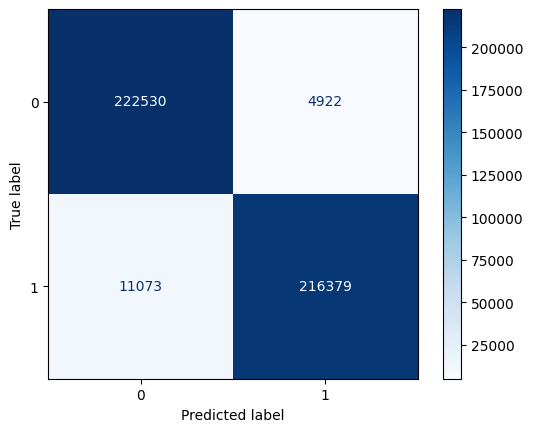

Training Precision: 0.98
Training Recall: 0.95


In [10]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm_model_1_train = confusion_matrix(y_train, model_1_train_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_model_1_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()

model_1_train_precision = precision_score(y_train, model_1_train_preds)
model_1_train_recall = recall_score(y_train, model_1_train_preds)

print(f'Training Precision: {model_1_train_precision:.2f}')
print(f'Training Recall: {model_1_train_recall:.2f}')

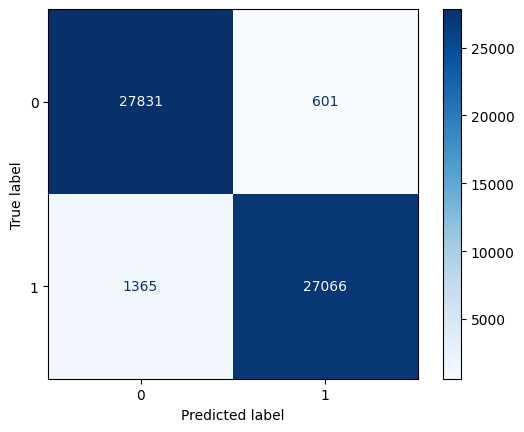

Validation Precision: 0.98
Validation Recall: 0.95


In [11]:
cm_model_1_val = confusion_matrix(y_val, model_1_val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_model_1_val)
disp.plot(cmap=plt.cm.Blues)
plt.show()

model_1_val_precision = precision_score(y_val, model_1_val_preds)
model_1_val_recall = recall_score(y_val, model_1_val_preds)

print(f'Validation Precision: {model_1_val_precision:.2f}')
print(f'Validation Recall: {model_1_val_recall:.2f}')

### Logistic Regression Results

With 96% accuracy, 98% precision, and 95% recall, this model is already pretty good, but we will continue to iterate with different models to see if we can make meaningful improvements.

Of particular concern is the recall. A recall of 95% means that the model is still failing to flag approximately 1 in 20 fraudulent transactions. If a more sophisticated model can improve the recall to ensure that fewer fraudulent transactions are ignored, it will likely be a worthwhile investment.

The good news is that given the similar metrics between the training and validation predictions, this model is well fit, and should extrapolate well to unseen data.

### Tuning Threshold Weights

One easy adjustment we could make to this model to increase the recall is to tune the threshold of the model to reduce false negatives. However, this will come at the cost of lowering the precision and overall accuracy. Still, if the business wants to focus on catching as many instances of fraud as possible, and is willing to accept more false positives (the model incorrectly predicting fraud), then this could be a viable option.

In [12]:
model_1_probs = pd.DataFrame(model_1.predict_proba(X_val))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
    preds = preds.iloc[:,1].values.reshape(preds.iloc[:,1].values.size,1)
    accuracy = accuracy_score(y_val, preds)
    precision = precision_score(y_val, preds)
    recall = recall_score(y_val, preds)
    print(f'Validation accuracy is {accuracy:.2f}')
    print(f'Validation Precision is {precision:.2f}')
    print(f'Validation Recall is {recall:.2f}')


******** For i = 0.05 ******
Validation accuracy is 0.89
Validation Precision is 0.82
Validation Recall is 0.99

******** For i = 0.1 ******
Validation accuracy is 0.93
Validation Precision is 0.89
Validation Recall is 0.99

******** For i = 0.15 ******
Validation accuracy is 0.95
Validation Precision is 0.92
Validation Recall is 0.98

******** For i = 0.2 ******
Validation accuracy is 0.95
Validation Precision is 0.93
Validation Recall is 0.98

******** For i = 0.25 ******


C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model

Validation accuracy is 0.96
Validation Precision is 0.95
Validation Recall is 0.97

******** For i = 0.3 ******
Validation accuracy is 0.96
Validation Precision is 0.96
Validation Recall is 0.97

******** For i = 0.35 ******
Validation accuracy is 0.96
Validation Precision is 0.96
Validation Recall is 0.97

******** For i = 0.4 ******
Validation accuracy is 0.97
Validation Precision is 0.97
Validation Recall is 0.96

******** For i = 0.45 ******


C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)


Validation accuracy is 0.97
Validation Precision is 0.97
Validation Recall is 0.96

******** For i = 0.5 ******
Validation accuracy is 0.97
Validation Precision is 0.98
Validation Recall is 0.95

******** For i = 0.55 ******
Validation accuracy is 0.97
Validation Precision is 0.98
Validation Recall is 0.95

******** For i = 0.6 ******
Validation accuracy is 0.96
Validation Precision is 0.99
Validation Recall is 0.94

******** For i = 0.65 ******
Validation accuracy is 0.96
Validation Precision is 0.99
Validation Recall is 0.94

******** For i = 0.7 ******


C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model

Validation accuracy is 0.96
Validation Precision is 0.99
Validation Recall is 0.94

******** For i = 0.75 ******
Validation accuracy is 0.96
Validation Precision is 0.99
Validation Recall is 0.93

******** For i = 0.8 ******
Validation accuracy is 0.96
Validation Precision is 0.99
Validation Recall is 0.93

******** For i = 0.85 ******
Validation accuracy is 0.96
Validation Precision is 0.99
Validation Recall is 0.92

******** For i = 0.9 ******
Validation accuracy is 0.95
Validation Precision is 1.00
Validation Recall is 0.90

******** For i = 0.95 ******


C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)
C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model

Validation accuracy is 0.94
Validation Precision is 1.00
Validation Recall is 0.87

******** For i = 0.99 ******
Validation accuracy is 0.92
Validation Precision is 1.00
Validation Recall is 0.84


C:\Users\adog1\AppData\Local\Temp\ipykernel_16576\3406435708.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  preds = model_1_probs.applymap(lambda x: 1 if x>i else 0)


### Threshold Tuning Results

As we can see, if the goal is to maximize recall, a lower threshold value is preferable. There are even models around a threshold of 0.2-0.45 that give a bump to recall without much reduction in precision or overall accuracy. Of course, 0.5 is the default threshold value and is what we saw in our initial assessment of the model.

While this could be helpful in a real-life application, we also want to explore other models that may perform better in all aspects so that we don't have to sacrifice precision in order to catch a very high percentage of fraud.

### Neural Network Model

Neural networks are known for performing very well with complex (highly dimensional) classification tasks such as this one, so I will utilize the TensorFlow Keras library to build and train a neural network on the training data for fraudulent credit card transactions.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [14]:
# Define a function that creates the model
def create_model(neurons_1=58, neurons_2=8, activation='relu', optimizer='adam', learn_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(29,)))
    model.add(Dense(neurons_1, activation=activation))
    model.add(Dense(neurons_2, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    opt_instance = optimizer(learning_rate=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt_instance, metrics=['accuracy'])
    return model

# Wrap the model in KerasClassifier from scikeras
model = KerasClassifier(
    model=create_model,
    verbose=0,
    optimizer=None
)

# Define the hyperparameter space
param_dist = {
    'model__neurons_1': [32, 58, 100],  # Number of neurons in the first dense layer
    'model__neurons_2': [8, 16, 32],    # Number of neurons in the second dense layer
    'model__activation': ['relu', 'tanh'],  # Activation functions
    'model__optimizer': [Adam, RMSprop],    # Optimizers
    'model__learn_rate': [0.001, 0.01, 0.1],  # Learning rates
    'batch_size': [16, 32, 64],  # Batch sizes
    'epochs': [10, 20, 30]       # Number of epochs
}

# Perform Randomized Search
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=20,
    scoring='accuracy', 
    cv=3, 
    verbose=1, 
    n_jobs=-1
)

# Fit the random search
random_search_result = random_search.fit(X_train, y_train)

# Display the best parameters and the corresponding score
print("Best accuracy: {:.2f}%".format(random_search_result.best_score_ * 100))
print("Best hyperparameters: ", random_search_result.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best accuracy: 99.93%
Best hyperparameters:  {'model__optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'model__neurons_2': 32, 'model__neurons_1': 100, 'model__learn_rate': 0.01, 'model__activation': 'tanh', 'epochs': 30, 'batch_size': 16}


In [15]:
nn_model = random_search_result.best_estimator_
nn_model

KerasClassifier(
	model=<function create_model at 0x000001DD95428A40>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=None
	loss=None
	metrics=None
	batch_size=16
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=30
	class_weight=None
	model__optimizer=<class 'keras.src.optimizers.rmsprop.RMSprop'>
	model__neurons_2=32
	model__neurons_1=100
	model__learn_rate=0.01
	model__activation=tanh
)

### Training Performance and Model Selection

Now we have selected a model with hyperparameters that have been optimized using a list of candidates and a randomized search cross validation algorithm from the Sci-Kit Learn library. The training performance of this model is impressive with an accuracy of 99.93%. However, we will need to perform validation testing to ensure that the model is not overfit to the training data.

In [16]:
nn_model_val_preds = nn_model.predict(X_val)

In [17]:
nn_model_val_accuracy = np.sum(nn_model_val_preds==y_val)/len(y_val)
print(f'The neural network model\'s accuracy on the validation data is {nn_model_val_accuracy: .4f}')

The neural network model's accuracy on the validation data is  0.9996


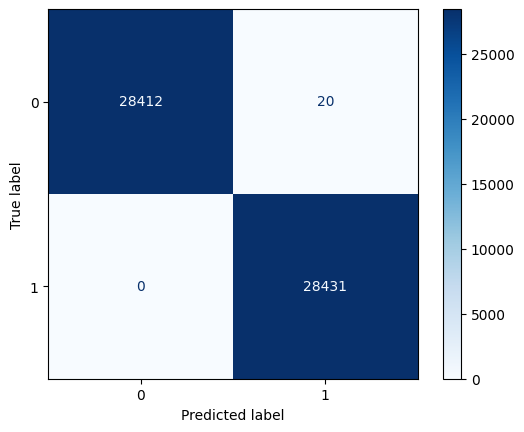

Validation Precision: 0.9993
Validation Recall: 1.0000


In [18]:
nn_model_val_cm = confusion_matrix(y_val, nn_model_val_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=nn_model_val_cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

nn_model_val_precision = precision_score(y_val, nn_model_val_preds)
nn_model_val_recall = recall_score(y_val, nn_model_val_preds)

print(f'Validation Precision: {nn_model_val_precision:.4f}')
print(f'Validation Recall: {nn_model_val_recall:.4f}')

### Validation Performance

The validation performance is roughly the same as the training performance, which shows that this is a well fit model. Interestingly, the mistakes that the model does make are all false positives (the model incorrectly predicts fraud) as indicated by the precision being .9993 while the recall is a perfect 1. This is likely a desirable outcome; depending on the specifics of the application, it may be better for the model to incorrectly label legitimate transactions as fraudulent rather than to fail to identify fraudulent transactions. Even so, a precision of .9993 is quite high, so this model is likely a good starting point for detecting fraudulent transactions.

### Testing Performance

Now that I have selected the neural network as the model to proceed with, I will determine its final performance metrics on the test data.

In [19]:
nn_model_test_preds = nn_model.predict(X_test)
nn_model_test_accuracy = np.sum(nn_model_test_preds==y_test)/len(y_test)
print(f'The neural network model\'s accuracy on the test data is {nn_model_test_accuracy: .4f} on a sample of {len(y_test)} observations')

The neural network model's accuracy on the test data is  0.9994 on a sample of 56863 observations


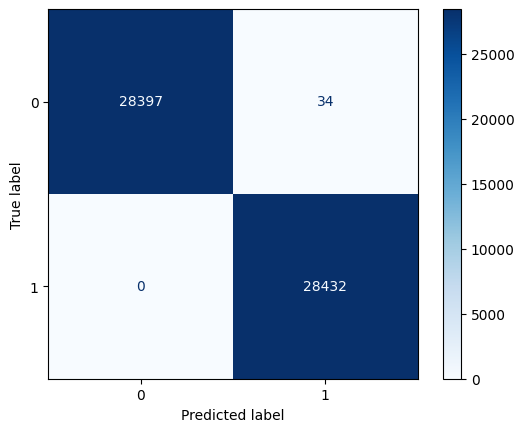

Validation Precision: 0.9988
Validation Recall: 1.0000


In [20]:
nn_model_test_cm = confusion_matrix(y_test, nn_model_test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=nn_model_test_cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

nn_model_test_precision = precision_score(y_test, nn_model_test_preds)
nn_model_test_recall = recall_score(y_test, nn_model_test_preds)

print(f'Validation Precision: {nn_model_test_precision:.4f}')
print(f'Validation Recall: {nn_model_test_recall:.4f}')

### Conclusion and Next Steps

The test performance of this model is similar to the validation and training performance of the model, indicating that the model is well fit and ready to start detecting fraudulent credit card transactions. Importantly, the recall is still a perfect 1. If there is a desire to increase precision versus recall, the model can be re-tuned to optimize for this, but this would depend on the real-world application and as discussed above, the model as it is will likely be ideal. As one other potential next step, remember that we noted at the beginning of the project that this was a balanced classification problem. If the real-world data is not roughly a balanced classification problem, we would likely need to retrain and retune this model for an imbalanced dataset. As it stands though, this is a great starting point and provides great performance in detecting fraudulent credit card transactions.

## Thank you for reading!
#### Alex Bartel 01/2025